### Kaggle Link: [Click here](https://www.kaggle.com/code/nyinyeinaung/predicting-government-certificate-rank-with-rnn)

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_curve,roc_auc_score,recall_score
%matplotlib inline

In [59]:
#read data
df = pd.read_csv('/kaggle/input/supply-chain-optimization-for-a-fmcg-company/FMCG_data.csv')
df.head(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071


* Ware_house_ID: Unique identifiers for each warehouse.
* WH_Manager_ID: Unique identifiers for the warehouse managers.
* Location_type: Indicates the type of location where each warehouse is situated.
* WH_capacity_size: Represents the capacity or size of each warehouse.
* zone: Categorizes the warehouses into specific zones.
* WH_regional_zone: Assigns each warehouse to a regional zone.
* num_refill_req_l3m: Records the number of refill requests received in the last 3 months.
* transport_issue_l1y: Indicates the occurrence of any transport-related issues within the last year.
* Competitor_in_mkt: Specifies the presence of competitors in the market.
* retail_shop_num: Provides the number of retail shops associated with each warehouse.
* wh_owner_type: Describes the ownership type of each warehouse.
* distributor_num: Represents the number of distributors associated with each warehouse.
* flood_impacted: Indicates whether a warehouse has been impacted by floods.
* flood_proof: Specifies whether a warehouse is flood-proof.
* electric_supply: Indicates the status of electric supply to each warehouse.
* dist_from_hub: Represents the distance of each warehouse from the hub.
* workers_num: Provides the number of workers employed at each warehouse.
* wh_est_year: Represents the year in which each warehouse was established.
* storage_issue_reported_l3m: Indicates whether any storage issues have been reported in the last 3 months.
* temp_reg_mach: Specifies the presence of temperature regulation machinery at each warehouse.
* approved_wh_govt_certificate: Indicates if each warehouse has an approved government certificate.
* wh_breakdown_l3m: Indicates whether any breakdowns have occurred at each warehouse in the last 3 months.
* govt_check_l3m: Indicates if government checks have been conducted for each warehouse in the last 3 months.
* product_wg_ton: Represents the weight of the product in tons.

In [60]:
#view the data type of features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [61]:
#descriptive statistics of numeric features
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
num_refill_req_l3m,25000.0,4.089040,2.606612,0.0,2.0,4.0,6.0,8.0
transport_issue_l1y,25000.0,0.773680,1.199449,0.0,0.0,0.0,1.0,5.0
Competitor_in_mkt,25000.0,3.104200,1.141663,0.0,2.0,3.0,4.0,12.0
retail_shop_num,25000.0,4985.711560,1052.825252,1821.0,4313.0,4859.0,5500.0,11008.0
distributor_num,25000.0,42.418120,16.064329,15.0,29.0,42.0,56.0,70.0
flood_impacted,25000.0,0.098160,0.297537,0.0,0.0,0.0,0.0,1.0
flood_proof,25000.0,0.054640,0.227281,0.0,0.0,0.0,0.0,1.0
electric_supply,25000.0,0.656880,0.474761,0.0,0.0,1.0,1.0,1.0
dist_from_hub,25000.0,163.537320,62.718609,55.0,109.0,164.0,218.0,271.0
workers_num,24010.0,28.944398,7.872534,10.0,24.0,28.0,33.0,98.0


# Data Cleaning

In [62]:
df.duplicated().sum()
#no duplicates

0

In [63]:
#check for features with null values
df.isnull().sum()
#3 columns with nulls: wh_est_year,workers_num and approved_wh_govt_certificate

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [64]:
print(df['wh_est_year'].isnull().sum())
#11881/25000 is null
## nearly half of the values is null --> discard the column
df.drop('wh_est_year',axis=1,inplace=True)

11881


<Axes: >

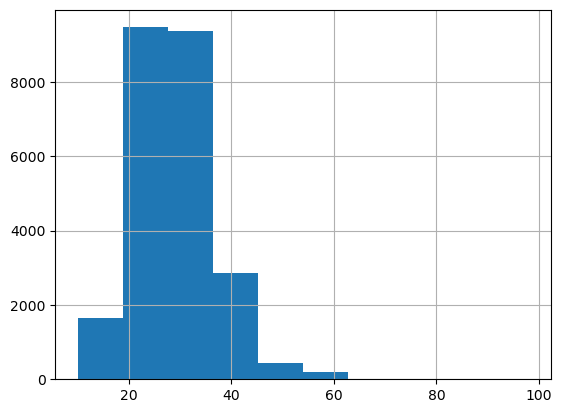

In [65]:
#make histogram for number of workers
#decent distribution, will fill the null values with mean
df['workers_num'].hist()

In [66]:
##only 1k missing -> replace null with mean
df['workers_num'] = df['workers_num'].fillna(df['workers_num'].mean())

C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64

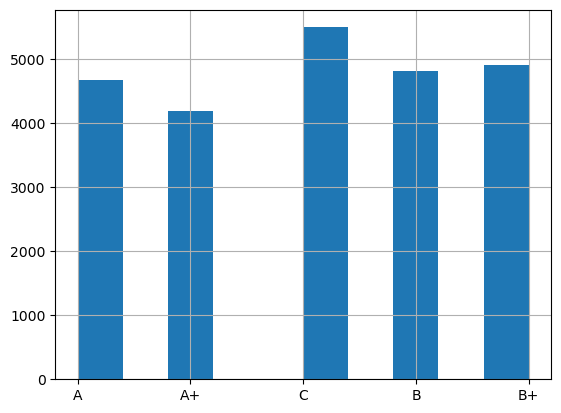

In [67]:
#make histogram for 'Approved warehouse govt certificate' feature
df['approved_wh_govt_certificate'].hist()
df['approved_wh_govt_certificate'].value_counts()

In [68]:
#the 5 categories are very similar in terms of popularity
#use the ffil method to use the last valid value to fill the null value
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].fillna(method='ffill')

[Text(0.5, 1.0, 'Location Type by zone')]

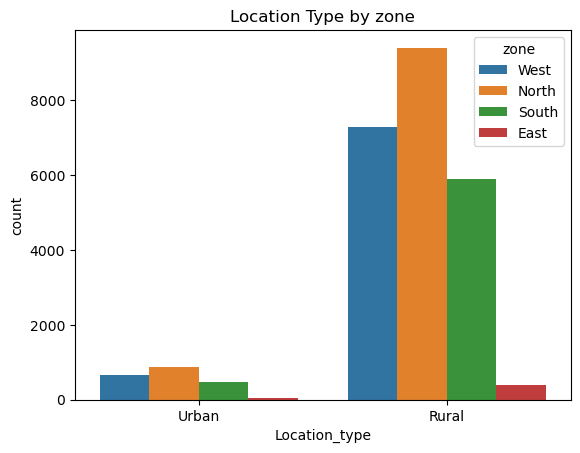

In [69]:
#make count plot for location type by zone
sns.countplot(data=df,x='Location_type',hue='zone').set(title='Location Type by zone')

<Axes: xlabel='approved_wh_govt_certificate', ylabel='wh_breakdown_l3m'>

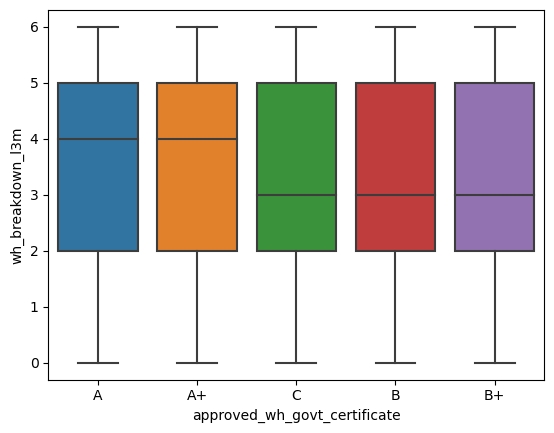

In [70]:
#make boxplot of approved govt certificate and wear house breakdowns in last 3 months
sns.boxplot(data=df,x='approved_wh_govt_certificate',y='wh_breakdown_l3m')

# Data preprocessing

In [71]:
#The Government Certificate will be used as the class
df.head(5)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,flood_proof,electric_supply,dist_from_hub,workers_num,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,1,91,29.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,0,1,210,31.0,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,0,161,37.0,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,0,103,21.0,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,0,1,112,25.0,18,0,C,6,24,24071


In [72]:
#label encoder turns label into numeric data
le = LabelEncoder()
df['Location_type']=le.fit_transform(df['Location_type'])
df['WH_capacity_size']=le.fit_transform(df['WH_capacity_size'])
df['approved_wh_govt_certificate']=le.fit_transform(df['approved_wh_govt_certificate'])
df['zone']=le.fit_transform(df['zone'])
df['WH_regional_zone']= le.fit_transform(df['WH_regional_zone'])
df['wh_owner_type']=le.fit_transform(df['wh_owner_type'])
## can also use the code below to transform into numeric data by removing "Zone" using lambda expression
##df['WH_regional_zone']=df['WH_regional_zone'].apply(lambda x: x.split(' ')[1]-1)

In [73]:
#drop these two features because they are IDs and aren't helpful
df = df.drop(['Ware_house_ID','WH_Manager_ID'],axis=1)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int64  
 1   WH_capacity_size              25000 non-null  int64  
 2   zone                          25000 non-null  int64  
 3   WH_regional_zone              25000 non-null  int64  
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int64  
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

<Axes: >

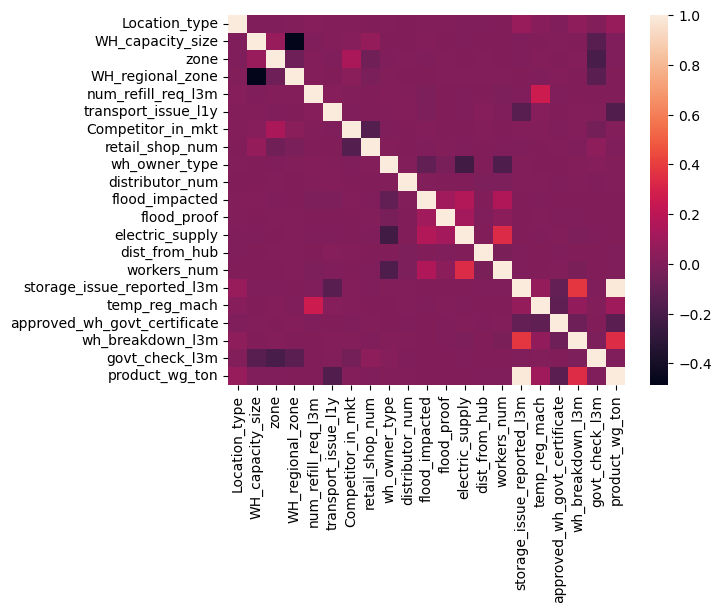

In [75]:
sns.heatmap(df.corr())

# Training and Testing split

In [76]:
#separate the class feature from the rest of the dataset
X = df.drop('approved_wh_govt_certificate',axis=1).values
y = df['approved_wh_govt_certificate'].values

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = MinMaxScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [78]:
print('X train shape: ',X_train.shape)
print('X test shape: ',X_test.shape)

X train shape:  (20000, 20)
X test shape:  (5000, 20)


# Model creation

In [79]:
#define a deep learning model
model = Sequential()

#20 neurons first layer because 20 inputs
model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

#5 neurons for last layer because 5 classes (grade of govt certificate)
model.add(Dense(5,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [80]:
#fit the model with data
history = model.fit(x=X_train,
          y=y_train, epochs=300,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/300
625/625 [==============================] - 4s 4ms/step - loss: 1.5457 - accuracy: 0.2734 - val_loss: 1.5150 - val_accuracy: 0.2886
Epoch 2/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4956 - accuracy: 0.3022 - val_loss: 1.5038 - val_accuracy: 0.2992
Epoch 3/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4840 - accuracy: 0.3116 - val_loss: 1.4917 - val_accuracy: 0.2976
Epoch 4/300
625/625 [==============================] - 2s 3ms/step - loss: 1.4777 - accuracy: 0.3182 - val_loss: 1.4887 - val_accuracy: 0.3018
Epoch 5/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4726 - accuracy: 0.3253 - val_loss: 1.4845 - val_accuracy: 0.3106
Epoch 6/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4698 - accuracy: 0.3228 - val_loss: 1.4812 - val_accuracy: 0.3142
Epoch 7/300
625/625 [==============================] - 2s 3ms/step - loss: 1.4664 - accuracy: 0.3223 - val_loss: 1.4829 - val_accuracy: 0.3158

<Axes: >

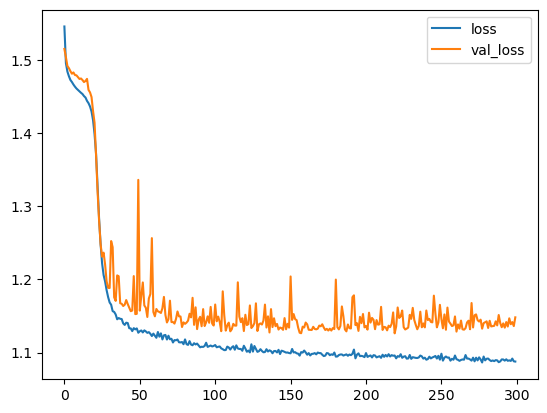

In [81]:
losses = {'loss':history.history['loss'],'val_loss':history.history['val_loss']}
losses = pd.DataFrame(losses)
losses.plot()

In [82]:
#define an earlystopper function
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

In [83]:
#create another model
model = Sequential()

#20 neurons first layer because 20 inputs
model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))
model.add(Dense(10,activation='relu'))

#5 neurons for last layer because 5 classes
model.add(Dense(5,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
#add an early stop as a callback
#this will stop the model fitting  when the validation loss is higher than the training loss after an x amount of epochs (this case 25)
history = model.fit(x=X_train,
          y=y_train, epochs=300,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/300
625/625 [==============================] - 4s 5ms/step - loss: 1.5341 - accuracy: 0.2795 - val_loss: 1.5083 - val_accuracy: 0.2868
Epoch 2/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4935 - accuracy: 0.2995 - val_loss: 1.4975 - val_accuracy: 0.2960
Epoch 3/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4828 - accuracy: 0.3116 - val_loss: 1.4952 - val_accuracy: 0.3060
Epoch 4/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4729 - accuracy: 0.3237 - val_loss: 1.4867 - val_accuracy: 0.2966
Epoch 5/300
625/625 [==============================] - 3s 4ms/step - loss: 1.4667 - accuracy: 0.3203 - val_loss: 1.4798 - val_accuracy: 0.3054
Epoch 6/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4617 - accuracy: 0.3273 - val_loss: 1.4845 - val_accuracy: 0.3104
Epoch 7/300
625/625 [==============================] - 2s 4ms/step - loss: 1.4594 - accuracy: 0.3282 - val_loss: 1.4799 - val_accuracy: 0.3024

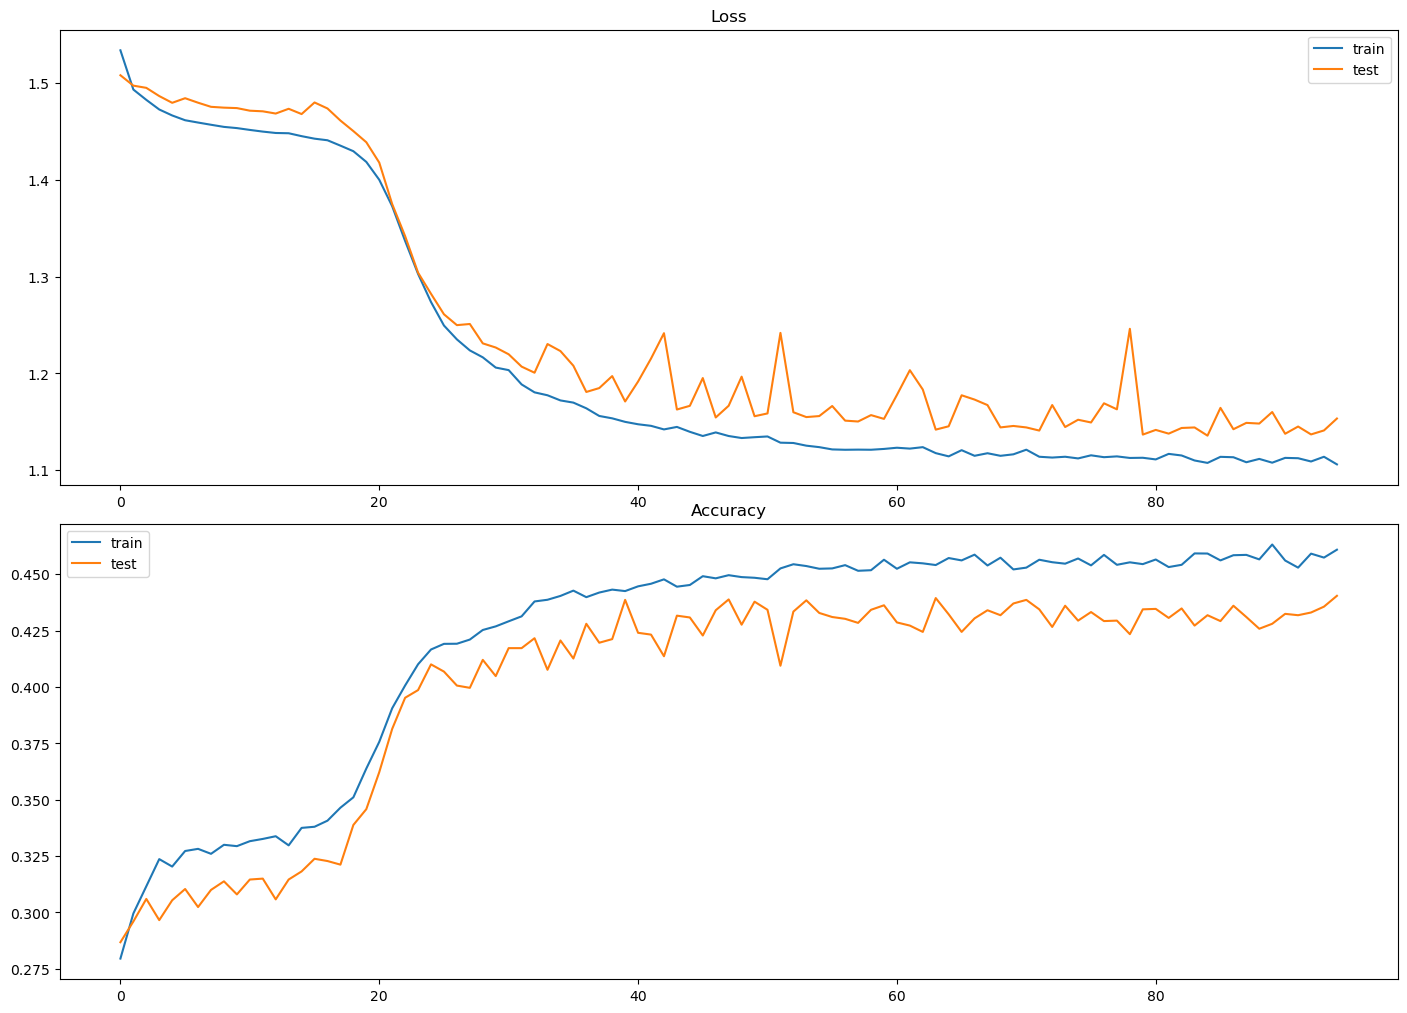

<Figure size 640x480 with 0 Axes>

In [85]:
#plot the loss and validation loss of the model
plt.figure(figsize=(14,10))
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.tight_layout()
# plot accuracy and validation accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()
plt.tight_layout()


In [86]:
##evaluate the model and print out the accuracy and loss
trainLoss, trainAcc = model.evaluate(X_train, y_train, verbose=0)
testLoss, testAcc = model.evaluate(X_test, y_test, verbose=0)

print('Train Accuracy: %.2f, Test Accuracy: %.2f' % (trainAcc*100, testAcc*100))
print('Train Loss: %.2f, Test Loss: %.2f' % (trainLoss*100, testLoss*100))

Train Accuracy: 46.12, Test Accuracy: 44.04
Train Loss: 110.90, Test Loss: 115.34


# Model Evaluation

In [87]:
#make predictions --> currently a probability
yProbs = model.predict(X_test)

#turn the yprobs into class labels using argmax to round the value to whole num
yPreds = yProbs.argmax(axis=1)

157/157 [==============================] - 0s 1ms/step


              precision    recall  f1-score   support

           0       0.48      0.25      0.33       974
           1       0.52      0.69      0.60       861
           2       0.41      0.13      0.19       987
           3       0.41      0.69      0.51      1020
           4       0.40      0.46      0.43      1158

    accuracy                           0.44      5000
   macro avg       0.44      0.44      0.41      5000
weighted avg       0.44      0.44      0.41      5000

157/157 [==============================] - 0s 2ms/step
ROC AUC:  0.8110824679509353


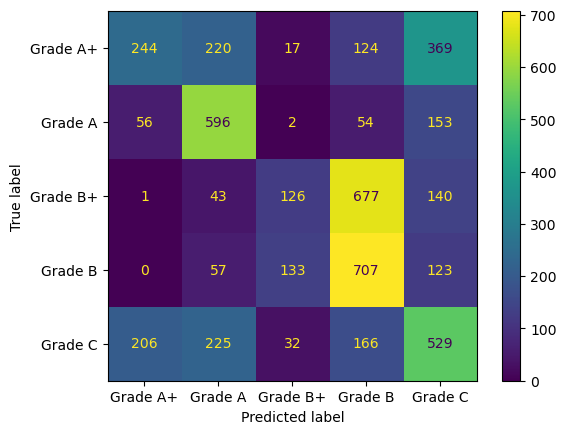

In [88]:
#print out a classification report
print(classification_report(y_test,yPreds))


#print ROC AUC
roc_auc = roc_auc_score(y_test, model.predict(X_test), multi_class='ovr')
print('ROC AUC: ', roc_auc)

conMat = confusion_matrix(y_test,yPreds)

#make a confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=conMat,display_labels=['Grade A+','Grade A','Grade B+','Grade B','Grade C'])
disp.plot()

157/157 [==============================] - 0s 2ms/step


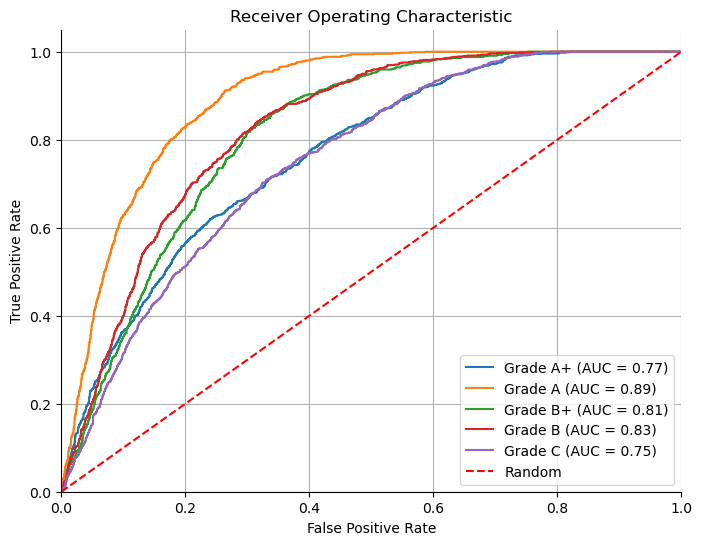

In [89]:
#plot roc curve of the model
y_test = pd.get_dummies(y_test)

class_probabilities = model.predict(X_test)
plt.figure(figsize=(8, 6))
rank = ['dummy','A+','A','B+','B','C']
for i in range(1, class_probabilities.shape[1]+1):
    fpr, tpr, _ = roc_curve(y_test.values[:, i-1], class_probabilities[:, i-1])
    roc_auc = roc_auc_score(y_test.values[:, i-1], class_probabilities[:, i-1])
    plt.plot(fpr, tpr, label='Grade {} (AUC = {:.2f})'.format(rank[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.grid(True)
sns.despine()
plt.show()